In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("fivethirtyeight")

In [2]:
# Load dataset
df = pd.read_csv('marketing_campaign_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [3]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# **Data Pre-processing** #

## **Feature engineering** ##

In [4]:
# Fix data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Membership duration
df['membership_duration'] = 2022 - df['Dt_Customer'].dt.year

# Age
df['age'] = 2022 - df['Year_Birth']

# Number of kids
df['num_of_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['num_of_kids'] > 0, 1, 0)

# Age group
df.loc[(df['age'] >= 0) & (df['age'] < 12), 'age_group'] = "child"
df.loc[(df['age'] >= 12) & (df['age'] < 18), 'age_group'] = "teens"
df.loc[(df['age'] >= 18) & (df['age'] < 30), 'age_group'] = "young_adults"
df.loc[(df['age'] >= 30) & (df['age'] < 50), 'age_group'] = "middle_aged_adults"
df.loc[(df['age'] >= 50), 'age_group'] = "older_adults"

# Total spending
df['total_spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Total accepted campaigns
df['total_accepted_campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Total transaction purchased
df['total_transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Conversion rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df['conversion_rate'] = round(df.apply(lambda x: cvr(x['total_transaction'],x['NumWebVisitsMonth']), axis=1), 2)

## **Data Cleansing** ##

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'membership_duration', 'age', 'num_of_kids', 'is_parents', 'age_group',
       'total_spending', 'total_accepted_campaigns', 'total_transaction',
       'conversion_rate'],
      dtype='object')

In [6]:
num_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'age', 
            'membership_duration', 'num_of_kids', 'total_spending']

cat_feat = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'is_parents', 
            'age_group']

In [7]:
df[num_feat].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age,membership_duration,num_of_kids,total_spending
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,...,4.084821,2.662054,5.790179,5.316518,3.0,11.0,53.194196,8.971875,0.950446,6.057982e+05
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,...,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069,0.684554,0.751803,6.022493e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,26.000000,8.000000,0.000000,5.000000e+03
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,2.000000,0.000000,3.000000,3.000000,3.0,11.0,45.000000,9.000000,0.000000,6.875000e+04
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,...,4.000000,2.000000,5.000000,6.000000,3.0,11.0,52.000000,9.000000,1.000000,3.960000e+05
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,...,6.000000,4.000000,8.000000,7.000000,3.0,11.0,63.000000,9.000000,1.000000,1.045500e+06
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,27.000000,28.000000,13.000000,20.000000,3.0,11.0,129.000000,10.000000,3.000000,2.525000e+06


In [8]:
# Check the null values
df.isna().sum()

Unnamed: 0                   0
ID                           0
Year_Birth                   0
Education                    0
Marital_Status               0
Income                      24
Kidhome                      0
Teenhome                     0
Dt_Customer                  0
Recency                      0
MntCoke                      0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Z_CostContact                0
Z_Revenue                    0
Response                     0
membership_duration          0
age                          0
num_of_k

In [9]:
# Handling null values
df_clean = df[df['age'] < 100].copy()
df_clean = df_clean.dropna()
df_clean.isna().sum()

Unnamed: 0                  0
ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
membership_duration         0
age                         0
num_of_kids                 0
is_parents

In [10]:
# Check any duplicates
df_clean.duplicated().sum()

0

In [11]:
# Fix incorrect values
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(['Janda'], 'Cerai')
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(['Duda'], 'Cerai')
df_clean['Marital_Status'].value_counts()

Menikah        857
Bertunangan    572
Lajang         474
Cerai          310
Name: Marital_Status, dtype: int64

In [12]:
df_clean.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,membership_duration,age,num_of_kids,is_parents,age_group,total_spending,total_accepted_campaigns,total_transaction,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,...,1,10,65,0,0,older_adults,1617000,0,25,3.57
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,0,8,68,2,1,older_adults,27000,0,6,1.20
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,0,9,57,0,0,older_adults,776000,0,21,5.25
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,0,8,38,1,1,middle_aged_adults,53000,0,8,1.33
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,0,8,41,1,1,middle_aged_adults,422000,0,19,3.80


# **Bivariate Analysis** #

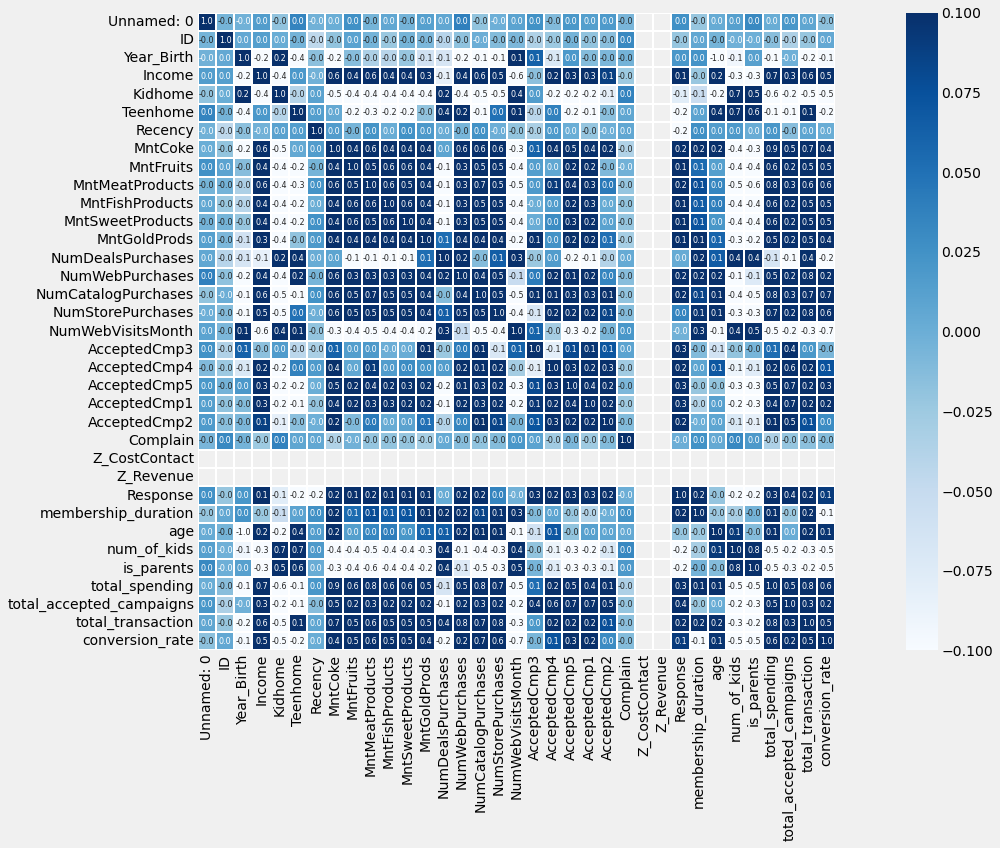

In [13]:
# Correlation plot
plt.figure(figsize=(20, 12))
corrmat = df_clean.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f', vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})
plt.tight_layout()
plt.savefig('heatmap', dpi=200)

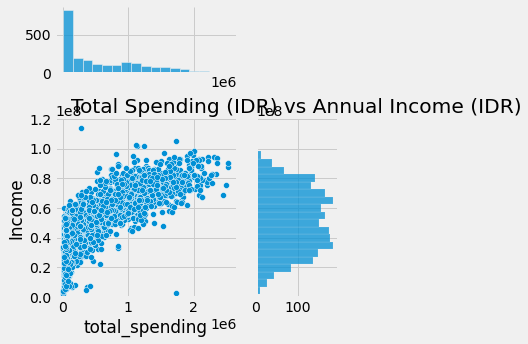

In [14]:
# Income vs Spending
plot = sns.jointplot(x=df_clean['total_spending'], y=df_clean['Income'], height=5, ratio=2, marginal_ticks=True)
plt.title('Total Spending (IDR) vs Annual Income (IDR)')
plot.ax_marg_y.set_ylim(0, 120000000)
plt.tight_layout()
plt.savefig('spending vs income', dpi=200)

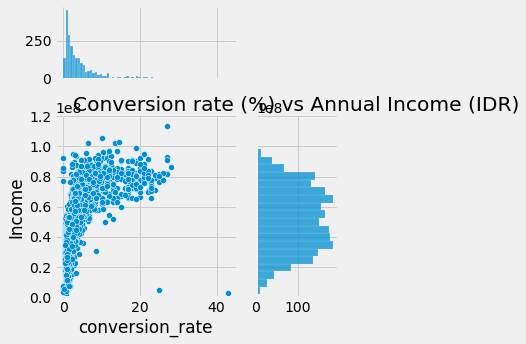

In [15]:
# Income vs Conversion Rate
plot = sns.jointplot(x=df_clean['conversion_rate'], y=df_clean['Income'], height=5, ratio=2, marginal_ticks=True)
plt.title('Conversion rate (%) vs Annual Income (IDR)')
plot.ax_marg_y.set_ylim(0, 120000000)
plt.tight_layout()
plt.savefig('cvr vs income', dpi=200)

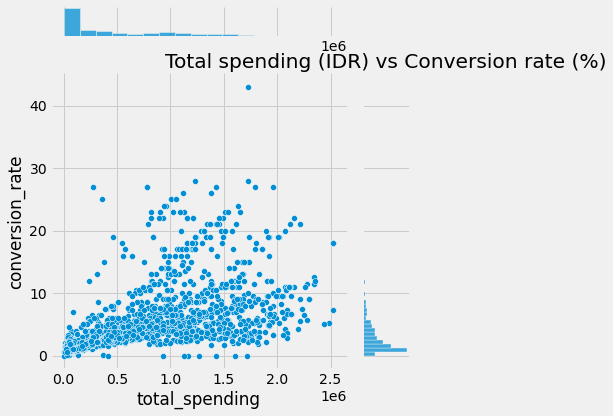

In [16]:
# Total spending vs Conversion Rate
plot = sns.jointplot(x=df_clean['total_spending'], y=df_clean['conversion_rate'])
plt.title('Total spending (IDR) vs Conversion rate (%)')
plt.tight_layout()
plt.savefig('cvr vs spending', dpi=200)

# **Feature Standarization** #

In [17]:
from sklearn.preprocessing import StandardScaler
df_std = df_clean.copy()
ss = StandardScaler()

for col in num_feat:
    df_std[col] = ss.fit_transform(df_std[[col]])
    
display(df_std.shape, df_std.head(3))

(2213, 39)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,membership_duration,age,num_of_kids,is_parents,age_group,total_spending,total_accepted_campaigns,total_transaction,conversion_rate
0,0,5524,1957,S1,Lajang,0.234435,-0.823208,-0.929307,2012-04-09,0.310773,...,1,1.499406,1.018785,-1.264914,0,older_adults,1.676723,0,25,3.57
1,1,2174,1954,S1,Lajang,-0.234084,1.039532,0.908545,2014-08-03,-0.380424,...,0,-1.417680,1.275248,1.404857,1,older_adults,-0.962927,0,6,1.20
2,2,4141,1965,S1,Bertunangan,0.769733,-0.823208,-0.929307,2013-08-21,-0.795142,...,0,0.040863,0.334882,-1.264914,0,older_adults,0.280531,0,21,5.25


# **Data Modelling: K-Means Clustering** #

<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

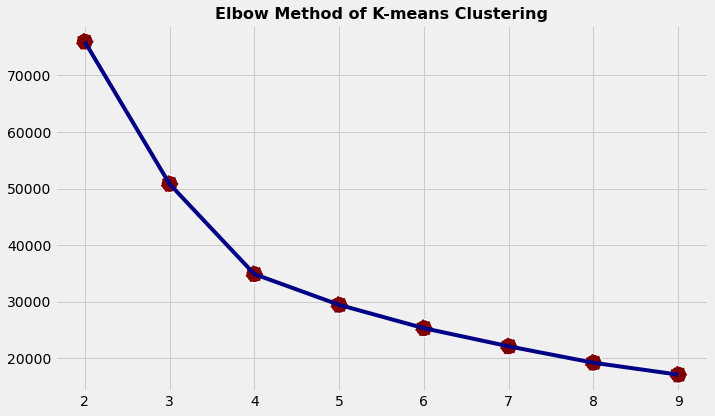

In [18]:
from sklearn.cluster import KMeans
X = df_std[['Income', 'total_spending', 'NumWebVisitsMonth', 'total_transaction', 'total_accepted_campaigns', 'conversion_rate', 'Recency']]
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=142)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.title('Elbow Method of K-means Clustering', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('kmeans', dpi=200)

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')

Best Cluster = 5

# **Eval: Silhouette Score** #

In [19]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=142)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.title('Silhouette Score of K-means Clustering', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('silhouette score', dpi=200)

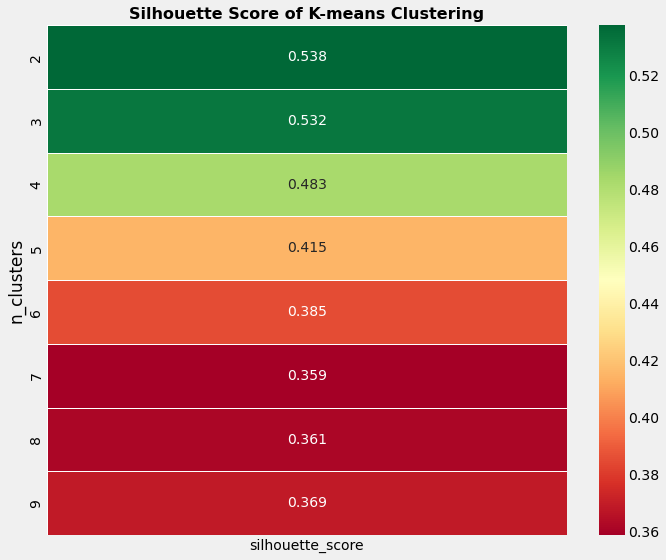

In [20]:
visualize_silhouette_layer(X)

# **Cluster Analysis** #

In [21]:
kmeans = KMeans(n_clusters=5, random_state=142)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df_clean['cluster'] = kmeans.labels_

In [22]:
df_clean['cluster'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "cluster": "total_customers"})

,clusters,total_customers
0,0,811
1,1,508
2,3,436
3,4,322
4,2,136


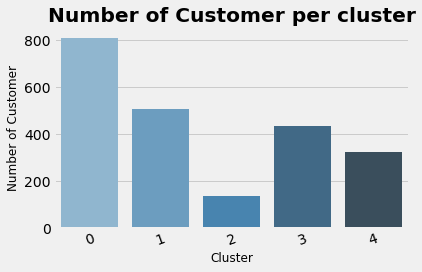

In [23]:
sns.countplot(x=df_clean['cluster'], palette='Blues_d')
plt.title('Number of Customer per cluster', fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customer', fontsize=12)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('cust per cluster', dpi=200)

## Cluster 0 ##

In [24]:
df_clean[(df_clean.cluster == 0)].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,membership_duration,age,num_of_kids,is_parents,total_spending,total_accepted_campaigns,total_transaction,conversion_rate,cluster
count,811.000000,811.000000,811.000000,8.110000e+02,811.000000,811.000000,811.000000,8.110000e+02,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,8.110000e+02,811.000000,811.000000,811.000000,811.0
mean,1128.817509,5612.843403,1971.750925,3.335183e+07,0.790382,0.432799,48.495684,2.506165e+04,3807.644883,14916.152898,...,0.081381,8.829840,50.249075,1.223181,0.875462,6.511221e+04,0.083847,6.586930,1.138977,0.0
std,653.831691,3224.334561,11.010864,1.434166e+07,0.494869,0.524802,28.920895,4.595281e+04,5699.468526,12966.352391,...,0.273588,0.674507,11.010864,0.703259,0.330398,6.331033e+04,0.290377,1.982211,0.597415,0.0
min,1.000000,13.000000,1940.000000,3.502000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,26.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000,0.0
25%,552.000000,2803.000000,1965.000000,2.453700e+07,1.000000,0.000000,24.000000,6.000000e+03,0.000000,7000.000000,...,0.000000,8.000000,43.000000,1.000000,1.000000,3.250000e+04,0.000000,5.000000,0.750000,0.0
50%,1142.000000,5454.000000,1973.000000,3.288000e+07,1.000000,0.000000,49.000000,1.500000e+04,2000.000000,11000.000000,...,0.000000,9.000000,49.000000,1.000000,1.000000,5.300000e+04,0.000000,7.000000,1.000000,0.0
75%,1697.000000,8372.500000,1979.000000,4.022850e+07,1.000000,1.000000,75.000000,3.100000e+04,5000.000000,19000.000000,...,0.000000,9.000000,57.000000,2.000000,1.000000,8.100000e+04,0.000000,8.000000,1.330000,0.0
max,2234.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.115000e+06,45000.000000,128000.000000,...,1.000000,10.000000,82.000000,3.000000,1.000000,1.376000e+06,2.000000,10.000000,7.000000,0.0


## Cluster 1 ##

In [25]:
df_clean[(df_clean.cluster == 1)].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,membership_duration,age,num_of_kids,is_parents,total_spending,total_accepted_campaigns,total_transaction,conversion_rate,cluster
count,508.000000,508.000000,508.000000,5.080000e+02,508.000000,508.000000,508.000000,5.080000e+02,508.000000,508.000000,...,508.000000,508.000000,508.000000,508.000000,508.000000,5.080000e+02,508.000000,508.000000,508.000000,508.0
mean,1121.586614,5486.334646,1967.470472,6.596805e+07,0.169291,0.561024,48.688976,5.267933e+05,42196.850394,289362.204724,...,0.226378,9.092520,54.529528,0.730315,0.598425,1.028449e+06,0.472441,20.171260,5.438858,1.0
std,648.563409,3324.171421,11.555249,1.286318e+07,0.405682,0.560199,28.778103,3.052698e+05,44634.087922,243535.284146,...,0.418899,0.688954,11.555249,0.699469,0.490700,5.079464e+05,0.838678,1.908199,2.523509,0.0
min,2.000000,1.000000,1941.000000,2.250700e+07,0.000000,0.000000,0.000000,4.700000e+04,0.000000,15000.000000,...,0.000000,8.000000,27.000000,0.000000,0.000000,2.640000e+05,0.000000,16.000000,0.000000,1.0
25%,586.750000,2554.500000,1958.000000,5.710300e+07,0.000000,0.000000,24.000000,2.967500e+05,9000.000000,101750.000000,...,0.000000,9.000000,46.000000,0.000000,0.000000,5.957500e+05,0.000000,19.000000,3.330000,1.0
50%,1060.000000,5308.500000,1968.000000,6.600050e+07,0.000000,1.000000,51.000000,4.500000e+05,25000.000000,191500.000000,...,0.000000,9.000000,54.000000,1.000000,1.000000,8.775000e+05,0.000000,20.000000,4.750000,1.0
75%,1674.750000,8495.000000,1976.000000,7.527650e+07,0.000000,1.000000,71.000000,7.095000e+05,61000.000000,447000.000000,...,0.000000,10.000000,64.000000,1.000000,1.000000,1.381500e+06,1.000000,22.000000,7.330000,1.0
max,2238.000000,11176.000000,1995.000000,9.654700e+07,2.000000,2.000000,99.000000,1.492000e+06,193000.000000,984000.000000,...,1.000000,10.000000,81.000000,3.000000,1.000000,2.302000e+06,4.000000,24.000000,11.000000,1.0


## Cluster 2 ##

In [26]:
df_clean[(df_clean.cluster == 2)].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,membership_duration,age,num_of_kids,is_parents,total_spending,total_accepted_campaigns,total_transaction,conversion_rate,cluster
count,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,1.360000e+02,136.000000,1.360000e+02,...,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.0
mean,1061.375000,5528.816176,1967.198529,7.859571e+07,0.007353,0.058824,48.720588,5.065441e+05,67125.000000,4.555662e+05,...,0.198529,8.566176,54.801471,0.066176,0.066176,1.285022e+06,0.588235,19.455882,19.455882,2.0
std,621.876812,3292.451902,14.097449,1.421554e+07,0.085749,0.236164,27.999654,3.066347e+05,51806.969001,2.585120e+05,...,0.400367,0.579939,14.097449,0.249509,0.249509,4.314835e+05,0.946499,4.132738,4.132738,0.0
min,21.000000,0.000000,1943.000000,2.447000e+06,0.000000,0.000000,0.000000,1.000000e+03,0.000000,3.000000e+03,...,0.000000,8.000000,27.000000,0.000000,0.000000,2.770000e+05,0.000000,13.000000,13.000000,2.0
25%,526.500000,2668.500000,1955.000000,7.265175e+07,0.000000,0.000000,25.750000,2.717500e+05,26000.000000,3.050000e+05,...,0.000000,8.000000,43.000000,0.000000,0.000000,9.870000e+05,0.000000,17.000000,17.000000,2.0
50%,1070.500000,5363.000000,1966.000000,8.003250e+07,0.000000,0.000000,52.000000,4.605000e+05,54500.000000,4.240000e+05,...,0.000000,9.000000,56.000000,0.000000,0.000000,1.212000e+06,0.000000,19.000000,19.000000,2.0
75%,1578.000000,7982.750000,1979.000000,8.383275e+07,0.000000,0.000000,72.000000,6.857500e+05,102000.000000,5.580000e+05,...,0.000000,9.000000,67.000000,0.000000,0.000000,1.574000e+06,1.000000,22.000000,22.000000,2.0
max,2221.000000,11071.000000,1995.000000,1.571460e+08,1.000000,1.000000,94.000000,1.296000e+06,197000.000000,1.725000e+06,...,1.000000,10.000000,79.000000,1.000000,1.000000,2.525000e+06,4.000000,43.000000,43.000000,2.0


## Cluster 3 ##

In [27]:
df_clean[(df_clean.cluster == 3)].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,membership_duration,age,num_of_kids,is_parents,total_spending,total_accepted_campaigns,total_transaction,conversion_rate,cluster
count,436.000000,436.000000,436.000000,4.360000e+02,436.000000,436.000000,436.000000,4.360000e+02,436.000000,436.000000,...,436.000000,436.000000,436.000000,436.000000,436.000000,4.360000e+02,436.000000,436.000000,436.000000,436.0
mean,1103.094037,5695.206422,1967.931193,5.150618e+07,0.451835,0.605505,49.334862,2.516330e+05,20598.623853,115103.211009,...,0.139908,9.057339,54.068807,1.057339,0.779817,4.787661e+05,0.243119,14.029817,3.016307,3.0
std,624.696581,3344.547732,11.439791,3.377417e+07,0.533883,0.542762,29.772899,2.714765e+05,31817.899942,142672.008350,...,0.347290,0.677328,11.439791,0.735889,0.414846,4.397185e+05,0.599290,2.160573,1.966094,0.0
min,13.000000,9.000000,1943.000000,1.730000e+06,0.000000,0.000000,0.000000,1.000000e+03,0.000000,1000.000000,...,0.000000,8.000000,30.000000,0.000000,0.000000,8.000000e+03,0.000000,10.000000,0.000000,3.0
25%,561.750000,2926.000000,1958.000000,4.020000e+07,0.000000,0.000000,23.000000,8.800000e+04,3000.000000,39000.000000,...,0.000000,9.000000,46.000000,1.000000,1.000000,2.230000e+05,0.000000,12.000000,1.880000,3.0
50%,1113.000000,5696.000000,1969.000000,4.912800e+07,0.000000,1.000000,50.000000,1.625000e+05,8500.000000,68000.000000,...,0.000000,9.000000,53.000000,1.000000,1.000000,3.140000e+05,0.000000,14.000000,2.330000,3.0
75%,1625.500000,8660.750000,1976.000000,6.098100e+07,1.000000,1.000000,74.000000,2.792500e+05,23250.000000,113250.000000,...,0.000000,10.000000,64.000000,2.000000,1.000000,4.670000e+05,0.000000,16.000000,3.400000,3.0
max,2239.000000,11166.000000,1992.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,194000.000000,849000.000000,...,1.000000,10.000000,79.000000,3.000000,1.000000,2.252000e+06,4.000000,18.000000,12.000000,3.0


## Cluster 4 ##

In [28]:
df_clean[(df_clean.cluster == 4)].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,membership_duration,age,num_of_kids,is_parents,total_spending,total_accepted_campaigns,total_transaction,conversion_rate,cluster
count,322.000000,322.000000,322.000000,3.220000e+02,322.000000,322.000000,322.000000,3.220000e+02,322.00000,3.220000e+02,...,322.000000,322.000000,322.000000,322.000000,322.000000,3.220000e+02,322.000000,322.000000,322.000000,322.0
mean,1163.835404,5558.090062,1966.124224,6.799297e+07,0.164596,0.655280,50.478261,6.483447e+05,48512.42236,3.051335e+05,...,0.198758,9.195652,55.875776,0.819876,0.677019,1.194335e+06,0.515528,26.704969,6.412609,4.0
std,639.420465,3041.048433,11.471356,1.462583e+07,0.371393,0.537492,28.623909,2.773416e+05,47201.04975,2.376151e+05,...,0.399686,0.613132,11.471356,0.677987,0.468343,3.966237e+05,0.861829,2.839953,3.138391,0.0
min,0.000000,17.000000,1943.000000,7.144000e+06,0.000000,0.000000,0.000000,2.000000e+04,0.00000,2.600000e+04,...,0.000000,8.000000,27.000000,0.000000,0.000000,4.160000e+05,0.000000,23.000000,0.000000,4.0
25%,646.500000,3240.250000,1957.000000,5.841175e+07,0.000000,0.000000,26.000000,4.450000e+05,12000.00000,1.512500e+05,...,0.000000,9.000000,47.000000,0.000000,0.000000,9.045000e+05,0.000000,25.000000,4.000000,4.0
50%,1215.000000,5347.500000,1967.000000,6.722000e+07,0.000000,1.000000,49.000000,6.190000e+05,31500.00000,2.300000e+05,...,0.000000,9.000000,55.000000,1.000000,1.000000,1.102500e+06,0.000000,26.000000,5.330000,4.0
75%,1711.250000,8464.250000,1975.000000,7.653950e+07,0.000000,1.000000,77.000000,8.212500e+05,73750.00000,3.877500e+05,...,0.000000,10.000000,65.000000,1.000000,1.000000,1.481500e+06,1.000000,28.000000,8.330000,4.0
max,2231.000000,11112.000000,1995.000000,1.608030e+08,1.000000,2.000000,99.000000,1.449000e+06,199000.00000,1.622000e+06,...,1.000000,10.000000,79.000000,3.000000,1.000000,2.524000e+06,4.000000,44.000000,14.500000,4.0


## Total Spending, Conversion Rate, Recency per Cluster ##

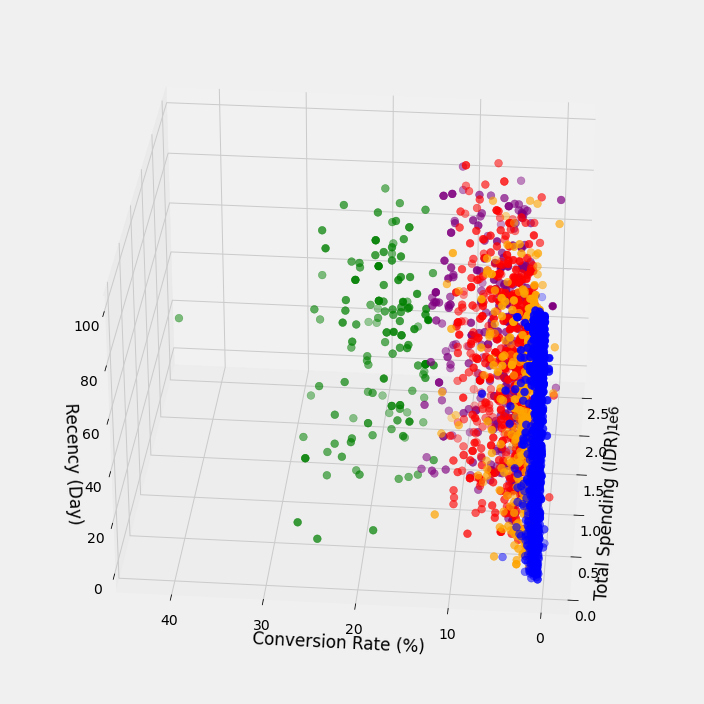

In [29]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean.total_spending[df_clean.cluster == 0], df_clean['conversion_rate'][df_clean.cluster == 0], df_clean['Recency'][df_clean.cluster == 0], c='blue', s=60)
ax.scatter(df_clean.total_spending[df_clean.cluster == 1], df_clean['conversion_rate'][df_clean.cluster == 1], df_clean['Recency'][df_clean.cluster == 1], c='red', s=60)
ax.scatter(df_clean.total_spending[df_clean.cluster == 2], df_clean['conversion_rate'][df_clean.cluster == 2], df_clean['Recency'][df_clean.cluster == 2], c='green', s=60)
ax.scatter(df_clean.total_spending[df_clean.cluster == 3], df_clean['conversion_rate'][df_clean.cluster == 3], df_clean['Recency'][df_clean.cluster == 3], c='orange', s=60)
ax.scatter(df_clean.total_spending[df_clean.cluster == 4], df_clean['conversion_rate'][df_clean.cluster == 4], df_clean['Recency'][df_clean.cluster == 4], c='purple', s=60)
ax.view_init(30, 185)
ax.set_zlabel('Recency (Day)')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Total Spending (IDR)')
plt.tight_layout()
plt.savefig('3D viz', dpi=200)

## Annual Income vs. Total Spending per Cluster ##

<Figure size 720x576 with 0 Axes>

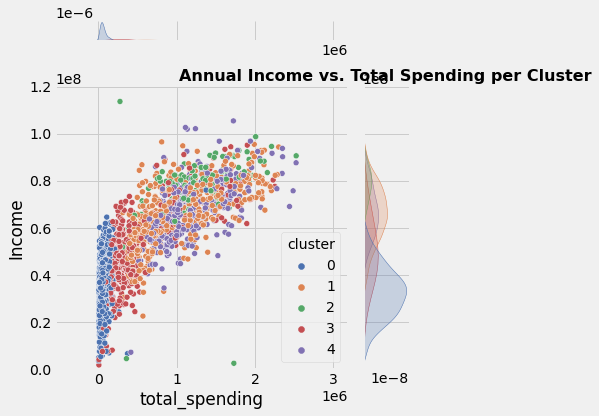

In [30]:
plt.figure(figsize=(10, 8))
plot = sns.jointplot(x=df_clean['total_spending'], y=df_clean['Income'], hue=df_clean['cluster'], palette='deep')
plt.title('Annual Income vs. Total Spending per Cluster', fontsize=16, fontweight='bold')
plot.ax_marg_y.set_ylim(0, 120000000)
plt.ylabel('Annual Income (IDR)', fontsize=16)
plt.xlabel('Total Spending (IDR)', fontsize=16)
plt.tight_layout()
plt.savefig('incomexspending cluster', dpi=200)

## Total Income per Cluster ##

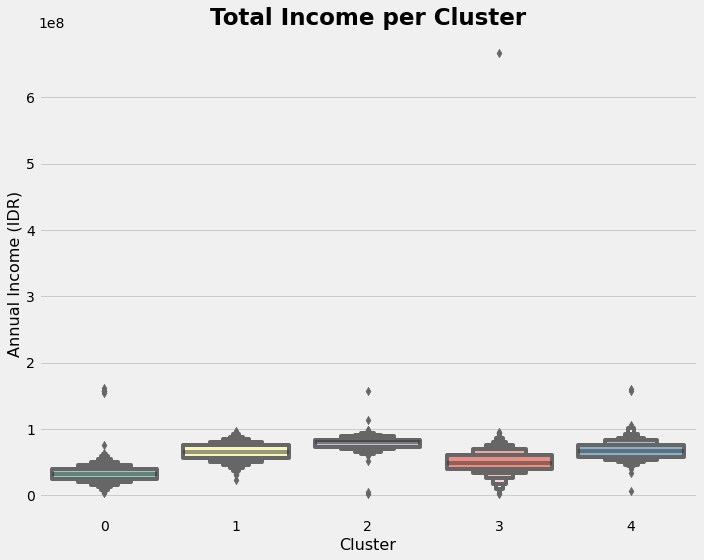

In [31]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['Income'], palette='Set3')
plt.title('Total Income per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Annual Income (IDR)', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
plt.savefig('income per cluster', dpi=200)

## Total Spending per Cluster ##

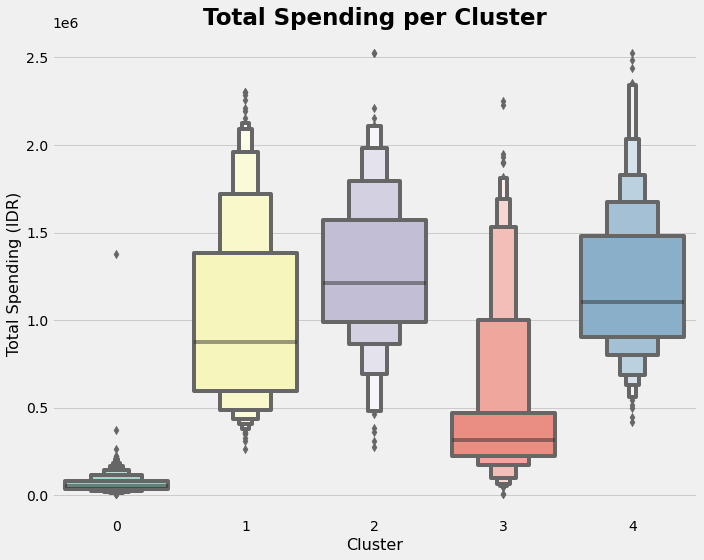

In [32]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['total_spending'], palette='Set3')
plt.title('Total Spending per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total Spending (IDR)', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
plt.savefig('spending per cluster', dpi=200)

## Total Web Visits per Cluster ##

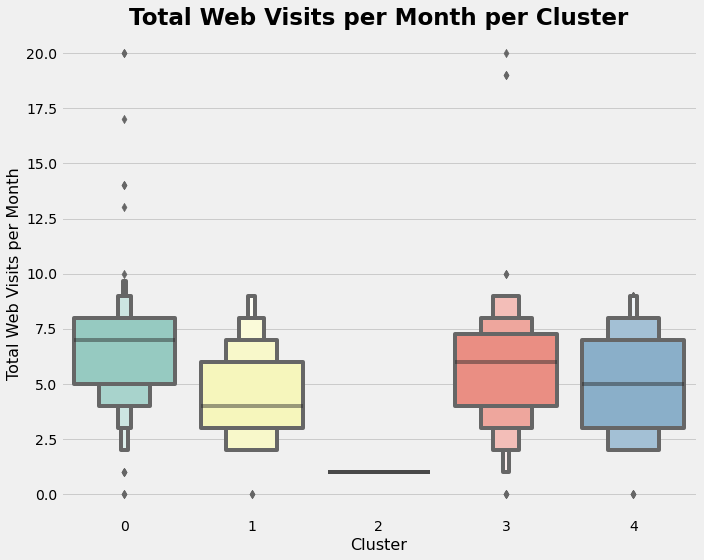

In [33]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['NumWebVisitsMonth'], palette='Set3')
plt.title('Total Web Visits per Month per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total Web Visits per Month', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
plt.savefig('web visits per cluster', dpi=200)

## Total Deals Purchased per Cluster ##

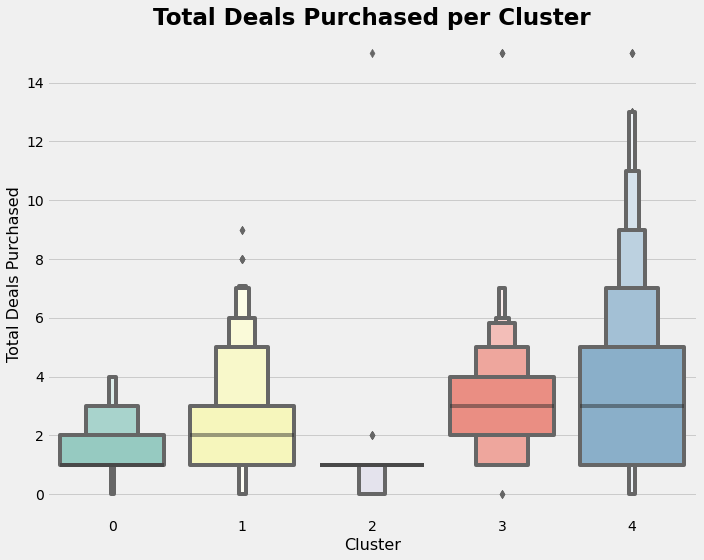

In [34]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['NumDealsPurchases'], palette='Set3')
plt.title('Total Deals Purchased per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total Deals Purchased', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
plt.savefig('deas per cluster', dpi=200)

## Conversion Rate per Cluster ##

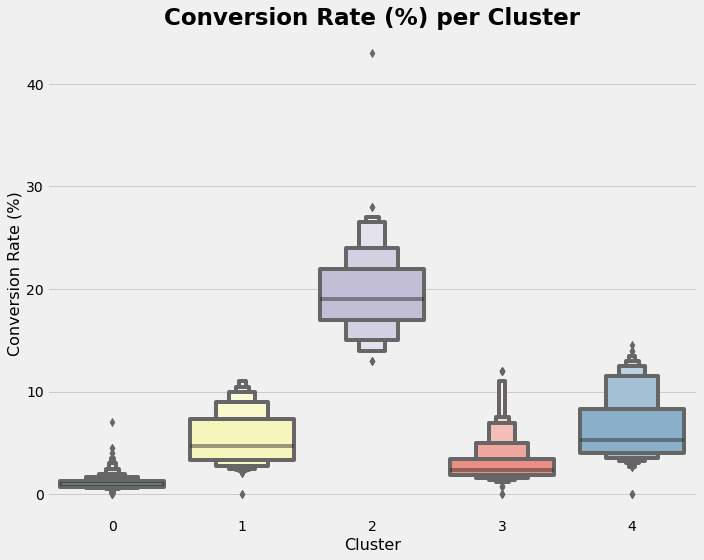

In [35]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['conversion_rate'], palette='Set3')
plt.title('Conversion Rate (%) per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Conversion Rate (%)', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
plt.savefig('cvr per cluster', dpi=200)

## **Cluster Interpretation Summary** ##

Berdasarkan hasil clustering dengan memperhitungkan prinsip RFM (Recency, Frequency, Monetary), diketahui terdapat 5 kategori customer, yaitu:

- Cluster 0: Kelompok ini merupakan kelompok dengan jumlah terbanyak. Didominasi oleh kelompok middle aged adults yang berusia 30-50 tahun dan dominan telah menikah serta mempunyai 1 anak. Kelompok ini paling sering mengunjungi website, dengan median sebanyak 7 kali dalam sebulan serta recency paling cepat di antara kelompok lainnya. Namun, kelompok ini paling sedikit melakukan transaksi, mempunyai total pendapatan dan pengeluaran terkecil dibandingkan kelompok lainnya, dengan rata-rata sebesar IDR 33 juta untuk total pendapatan setahun, dan IDR 65K untuk pengeluaran dalam setahun. Conversion rate untuk kelompok ini adalah yang terkecil, yaitu 1.13%.

- Cluster 1: Kelompok ini merupakan kelompok dengan jumlah terbanyak kedua. Didominasi oleh kelompok older adults yang berusia di atas 50 tahun dan dominan telah menikah serta mempunyai 1 anak. Kelompok ini tidak terlalu sering mengunjungi website, dengan median sebanyak 4 kali dalam sebulan serta recency cukup lama di antara kelompok lainnya. Kelompok ini terbanyak kedua dalam melakukan transaksi, dengan rata-rata total pendapatan setahun sebesar IDR 66 juta dan IDR 1 juta untuk pengeluaran dalam setahun. Conversion rate untuk kelompok ini adalah yang terbesar ketiga, yaitu 5.43%.

- Cluster 2: Kelompok ini merupakan kelompok dengan jumlah paling sedikit. Didominasi oleh kelompok older adults yang berusia di atas 50 tahun dan dominan telah menikah namun tidak mempunyai anak. Kelompok ini paling jarang mengunjungi website, dengan median sebanyak 1 kali dalam sebulan serta recency paling lama di antara kelompok lainnya. Kelompok ini terbanyak ketiga dalam melakukan transaksi, mempunyai total pendapatan dan pengeluaran tertinggi dibandingkan kelompok lainnya, dengan rata-rata sebesar IDR 79 juta untuk total pendapatan setahun, dan IDR 1.3 juta untuk pengeluaran dalam setahun. Conversion rate untuk kelompok ini adalah yang terbesar, yaitu 19.45%.

- Cluster 3: Kelompok ini merupakan kelompok dengan jumlah terbanyak ketiga. Didominasi oleh kelompok older adults yang berusia di atas 50 tahun dan dominan telah menikah serta mempunyai 1 anak. Kelompok ini cukup sering mengunjungi website, dengan median sebanyak 6 kali dalam sebulan serta recency cukup cepat di antara kelompok lainnya. Kelompok ini terbanyak keempat dalam melakukan transaksi, dengan rata-rata total pendapatan setahun sebesar IDR 52 juta dan IDR 478K untuk pengeluaran dalam setahun. Conversion rate untuk kelompok ini adalah yang terkecil kedua, yaitu 3.01%.

- Cluster 4: Kelompok ini merupakan kelompok dengan jumlah terbanyak keempat. Didominasi oleh kelompok older adults yang berusia di atas 50 tahun dan dominan telah menikah serta mempunyai 1 anak. Kelompok ini cukup sering mengunjungi website, dengan median sebanyak 5 kali dalam sebulan serta recency paling cepat di antara kelompok lainnya. Kelompok ini terbanyak dalam melakukan transaksi, dengan rata-rata total pendapatan setahun sebesar IDR 68 juta dan IDR 1.2 juta untuk pengeluaran dalam setahun. Conversion rate untuk kelompok ini adalah yang terbesar kedua, yaitu 6.41%.

# **Business Recommendation for Marketing Retargeting** ##
- Tetap monitor transaksi dari cluster 2 yang tergolong high spender, fokus untuk tingkatkan service agar kelompok kelompok ini tetap loyal dan tidak churn.
- Untuk cluster 1 dan 4 yang tergolong dalam medium spender dapat dilakukan analisis lebih lanjut untuk meningkatkan transaksinya dengan memberikan rekomendasi yang lebih personal, serta analisis lebih dalam bagaimana untuk optimasi promo pada segmen ini dan tetap berbelanja di platform kita.
- Untuk cluster 0 dan 3 termasuk ke dalam low spender dan paling beresiko untuk churn. Dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction. Mereka mempunyai jumlah visit yang paling tinggi tapi jarang melakukan transaksi. Hal ini dapat disebabkan oleh produk ataupun harga yang tidak cocok.